Otsu thresholding theory:
1. input image
2. Histogram 
3. Set up initial wi (0) and i(0)
4. Update values of wi(T) and i(T)
5. compute variance
6. select threshold intensity T
7. Image clipping 
8. Output image

In [1]:
%pylab
%matplotlib inline
import matplotlib.pyplot as plt
import numpy

Using matplotlib backend: <object object at 0x0000021C5D37B5F0>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


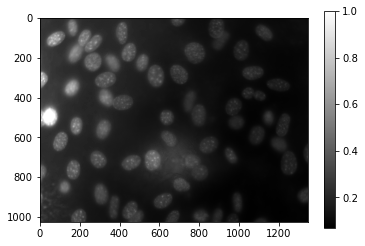

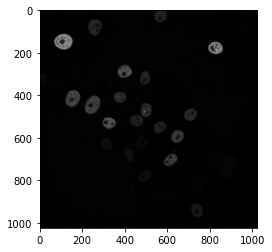

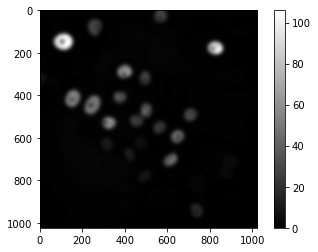

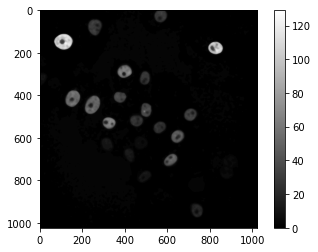

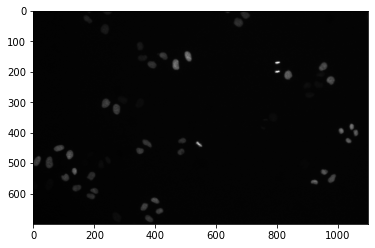

In [3]:
#Input image
img_1 = imread(r"data\Otsu_data\NIH3T3\img\dna-44.png")
figure()  
imshow(img_1, 'gray')
colorbar()

img_2 = imread(r"data\Otsu_data\N2DH-GOWT1\img\t39.tif") 
figure()  
imshow(img_2, 'gray')
def clip (img):
    copy = img.copy()
    for i in ndindex(copy.shape):
        if copy[i] >= 1 : copy[i] = 0
    return copy

img_2_clip = clip(img_2)
import scipy.ndimage
gauss1 = scipy.ndimage.gaussian_filter(img_2,9)
figure()
imshow(gauss1, 'gray')
colorbar()

median1 = scipy.ndimage.median_filter(img_2, 11)
figure()
imshow(median1, 'gray')
colorbar()

img_3 = imread(r"data\Otsu_data\N2DL-HeLa\img\t13.tif") 
figure()  
imshow(img_3, 'gray')

(array([616806., 475731., 174730.,  59216.,  29201.,   9181.,   4539.,
          2020.,   1205.,   3627.]),
 array([0.06666667, 0.16      , 0.25333333, 0.34666666, 0.44      ,
        0.53333336, 0.62666667, 0.72      , 0.81333333, 0.9066667 ,
        1.        ], dtype=float32),
 <BarContainer object of 10 artists>)

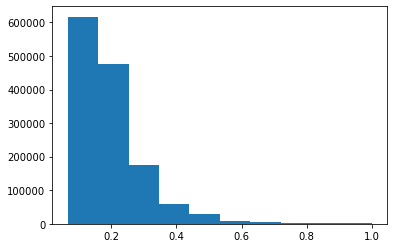

In [7]:
#histogram 
plt.hist(img_1.flatten())

In [32]:
'''
def intensities(img):
    intensities = 
    for x, y in np.ndindex((h,w)):
        intensities.append(img[x,y])

    print(len(intensities))
    return len(intensities)
'''
#print(len(img_1))
def otsu_thresholding(img):
  
   
    n, bins, patches = plt.hist(img.flatten(),log = 'False')
    
    thres = 0
    copy = img.copy()
    bcv = list()
    for i in range(0,len(n)):
        bclv = 0
        w0_sum = 0
        mean_sum0 = 0
        v0_sum = 0
        mean_sum1 = 0
        v1_sum = 0
        w0 = 0
        w1 = 0
        w1_sum = 0
        for j in range(0,i+1):
            w0_sum += n[j]
            mean_sum0 += bins[j]*n[j]
            

        w0 = w0_sum / sum(n)    
        mean_0 = mean_sum0 / sum(n[0:i+1])
        
        for m in range(0,i+1):
            v0_sum += ((bins[m]-mean_0)** 2) * n[m]
        
        v0 = v0_sum / sum(n[0:i+1])
        
        for k in range(i+1, len(n)): 
            w1_sum += n[k]
          
            mean_sum1 += bins[k]*n[k]
            
        w1 = w1_sum / sum(n)
     
        mean_1 = mean_sum1 / sum(n[i+1:len(n)])

        for s in range(i+1,len(n)):
            v1_sum += ((bins[s]-mean_1) ** 2) * n[s]
        
        v1 = v1_sum / sum(n[i+1:len(n)])
        bclv = (w0 * v0) + (w1 * v1)
        bcv.append(bclv)

    optimal_thres = min(bcv)
    l = 0
    while l < len(bcv):
        if bcv[l] == optimal_thres: thres = bins[l]
        l += 1


    for o in ndindex(copy.shape):
        if copy[o] < (thres): 
            copy[o] = 0
        else:
            copy[o] = 255

    figure()  
    imshow(copy, 'gray')
    colorbar()

    return copy 
    

C:\Users\marie\AppData\Local\Temp\ipykernel_23968\4158127164.py:49: RuntimeWarning: invalid value encountered in double_scalars
  mean_1 = mean_sum1 / sum(n[i+1:len(n)])
C:\Users\marie\AppData\Local\Temp\ipykernel_23968\4158127164.py:54: RuntimeWarning: invalid value encountered in double_scalars
  v1 = v1_sum / sum(n[i+1:len(n)])


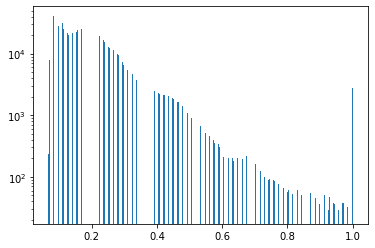

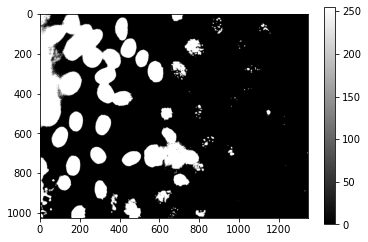

In [33]:
first_otsu = otsu_thresholding(img_1)

[9.78697e+05 2.78210e+04 1.62080e+04 1.06310e+04 6.55900e+03 2.56900e+03
 1.56600e+03 1.61400e+03 1.96600e+03 9.45000e+02]
[  0.   10.6  21.2  31.8  42.4  53.   63.6  74.2  84.8  95.4 106. ]
0.06664180755615234
0.04010963439941406
0.024652481079101562
0.014513969421386719
0.008258819580078125
0.005808830261230469
0.004315376281738281
0.0027761459350585938
0.0009012222290039062
0.0
10.6
[26.934019438342993, 18.37973472475, 18.444636334478105, 23.938259037540778, 31.766552481259264, 37.229594910598465, 42.583434493110026, 50.527132209523266, 63.43178923926225, nan]
18.37973472475


C:\Users\marie\AppData\Local\Temp\ipykernel_20248\605300310.py:41: RuntimeWarning: invalid value encountered in double_scalars
  mean_1 = mean_sum1 / sum(n[i+1:len(n)])
C:\Users\marie\AppData\Local\Temp\ipykernel_20248\605300310.py:46: RuntimeWarning: invalid value encountered in double_scalars
  v1 = v1_sum / sum(n[i+1:len(n)])


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

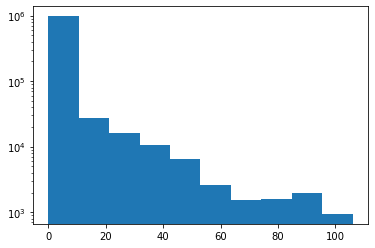

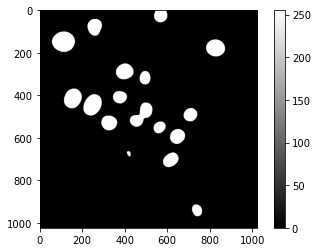

In [175]:
otsu_thresholding(gauss1)